# Proyecto 2

#### Para comenzar el proyecto 2, comienzo por cargar el Dataset de Properati  y aplica el los mismos filtros que el Proyecto 1 solicitaba, y entreno el modelo de Arbol de regresión. Esto me sirve para realizar comparaciones de mejora a lo largo del Notebook

In [1]:
'''Importo librerias basicas de trabajo'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Proyecto 1

En esta sección empleo los mismo filtros que se solicitaban en el proyecto 1.La data obtenida a apartir de estos filtros los empleare en el proyecto 2

In [2]:
'''Cargo el Dataset'''
data=pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
print('El data set de inicio tiene',data.shape[0], ' filas y', data.shape[1], 'columnas')

El data set de inicio tiene 146660  filas y 19 columnas


Realizo el Filtrado que solicitaba que se solicitaba en el proyecto 1

In [4]:
'''Filtrado de instancias l2 registradas en Capital Federal con tipo de propiedad de Departamento, Casa y PH'''
data_ml=data[(data.l2 == 'Capital Federal') & (data.property_type.isin(['Departamento', 'Casa', 'PH']))]

In [5]:
'''Filtrado de instancias menores a 15 m2 y mayores a 1000 m2 en superficie total'''
data_ml = data_ml[(data_ml.surface_total >= 15)] 
data_ml = data_ml[(data_ml.surface_total <= 1000)]
print('valor minimo en superficie total', data_ml.surface_total.min())
print('valor maximo en superficie total', data_ml.surface_total.max())

valor minimo en superficie total 15.0
valor maximo en superficie total 1000.0


In [6]:
'''Filtrar instancias menor a 4000000 dolares'''
data_ml = data_ml[(data_ml.price <= 4000000 )]

In [7]:
'''Filtrado por columnas de interes'''
data_ml = data_ml[['l3','property_type','rooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]

In [8]:
'''Verificar la presencia de valores vacios'''
data_ml.isnull().sum()

l3                   0
property_type        0
rooms                0
bathrooms          880
surface_total        0
surface_covered    517
price                0
dtype: int64

In [9]:
'''Compruebo la presencia de valores invertidos en columnas de superfice'''
datos_invertidos= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos),'datos invertidos')

Existen 751 datos invertidos


In [10]:
'''Filtrado de valores erroneos'''
data_ml = data_ml[(data_ml.surface_total >= data_ml.surface_covered)] 

In [11]:
'''Comprobacion de no existencia de datos invertidos'''
datos_invertidos_2= data_ml.loc[data_ml.surface_total < data_ml.surface_covered]
print('Existen', len(datos_invertidos_2),'datos invertidos')

Existen 0 datos invertidos


In [12]:
data_ml.isnull().sum()

l3                   0
property_type        0
rooms                0
bathrooms          829
surface_total        0
surface_covered      0
price                0
dtype: int64

En este punto realizo una copia del DataSet, ya que a partir de este en donde ya se encuentran aplicados los filtros del proyecto 1, esta copia realizada sera mi DataSet de Trabajo para el Proyecto 2

In [13]:
'''Realizo una copia que mas adelante usare'''
data_py2 = data_ml.copy()

In [14]:
'''Limpieza de filas con valores vacios'''
data_ml = data_ml.dropna(subset=['bathrooms'])
data_ml.reset_index(drop=True, inplace=True)

In [15]:
'''Verificar la limpieza de datos nulos'''
data_ml.isnull().sum()

l3                 0
property_type      0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

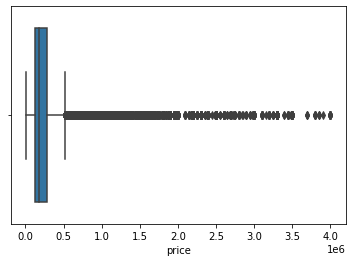

In [16]:
'''Corroboró la presencia de Outliers '''
sns.boxplot(x='price', data= data_ml)

In [17]:
'''Limpieza de outliers'''
def limpiar_dataframe(dataframe, columna):
    q25, q75 = np.percentile(dataframe[columna], [25, 75])
    iqr = q75 - q25
    if (q25 -(1.5 * iqr)) < 0:
        IQMenor = 0.0
    else:
        IQMenor = float(q25 - (1.5 * iqr))

    IQMayor = float(q75 + (1.5 * iqr))
    
    dataframe = dataframe[(dataframe[columna] > IQMenor ) &
        (dataframe[columna] < IQMayor)]
    
    return dataframe

In [18]:
'''Aplico la limpieza de Outliers a las columnas de interes'''
data_columnas = ['rooms','bathrooms','surface_total','surface_covered','price']
for i in data_columnas:
    data_ml = limpiar_dataframe(data_ml,i)

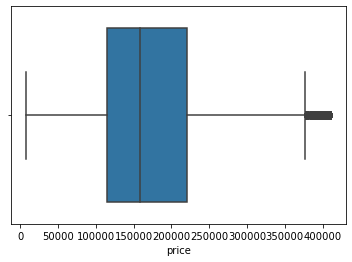

In [19]:
'''Corroboró la eliminación de Outliers '''
sns.boxplot(x='price', data= data_ml)

In [20]:
'''Eliminar valores duplicados'''
data_ml.drop_duplicates(inplace=True)      #DataSet de proyecto 1
data_py2.drop_duplicates(inplace=True)     #DataSet de trabajo para proyecto 2

In [21]:
'''Separo en X e Y mis Datos del Proyecto 1'''
x = data_ml[['rooms', 'surface_covered']]
y = data_ml[['price']]

# Entreno arbol de proyecto 1

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [24]:
'''Librerias para metricas de error'''
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [25]:
from sklearn.tree import DecisionTreeRegressor
arbol_py1 = DecisionTreeRegressor(max_depth= 7, random_state=42)

In [26]:
'''Entrenar el arbol'''
arbol_py1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [27]:
print ("R2 of DecisionTreeRegressor train:", arbol_py1.score(x_train,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, arbol_py1.predict(x_train))))

R2 of DecisionTreeRegressor train: 0.5602633520852449
RMSE train: 52932.89084963272


In [28]:
print ("R2 of DecisionTreeRegressor  test:", arbol_py1.score(x_test,y_test) )
r2_py1 = arbol_py1.score(x_test,y_test) 
print('RMSE test:',np.sqrt(mean_squared_error(y_test, arbol_py1.predict(x_test))))

R2 of DecisionTreeRegressor  test: 0.5350388799882471
RMSE test: 54284.76528901331


In [29]:
'''Tomo una muestra de mi x_test para hacerlo mas visual'''
idxs = np.random.randint(x_test.shape[0], size=10)
idxs

array([ 5989,  7153,  8828,  7895,  9967,   517,  2606,  3947, 11128,
        3205])

In [30]:
muestra = x_test.iloc[idxs]
muestra

,rooms,surface_covered
9825,3.0,47.0
70896,2.0,40.0
19797,3.0,52.0
8391,2.0,33.0
23024,2.0,25.0
6140,2.0,42.0
12034,2.0,46.0
40494,2.0,40.0
24709,3.0,68.0
14511,2.0,62.0


In [31]:
'''Se hace la prediccion con los datos seleccionados'''
prediccion = arbol_py1.predict(muestra)
prediccion

array([132110.09090909, 122734.53496209, 140526.15803109,  94693.06185567,
        73783.47321429, 132023.6244898 , 143544.1726568 , 122734.53496209,
       206371.32290363, 229361.32432432])

In [32]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [33]:
'''Comparacion entre valores reales y valores predichos'''
i = 0
while i <= 9:
    print('valor real =',valor_data[i],' valor predicho', prediccion[i])
    i = i + 1

valor real = 92000.0  valor predicho 132110.0909090909
valor real = 167000.0  valor predicho 122734.5349620893
valor real = 140000.0  valor predicho 140526.1580310881
valor real = 78000.0  valor predicho 94693.06185567011
valor real = 63000.0  valor predicho 73783.47321428571
valor real = 142900.0  valor predicho 132023.6244897959
valor real = 155000.0  valor predicho 143544.17265680057
valor real = 90000.0  valor predicho 122734.5349620893
valor real = 330000.0  valor predicho 206371.32290362954
valor real = 347196.0  valor predicho 229361.32432432432


In [34]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,92000.0,132110.090909
1,167000.0,122734.534962
2,140000.0,140526.158031
3,78000.0,94693.061856
4,63000.0,73783.473214
5,142900.0,132023.624490
6,155000.0,143544.172657
7,90000.0,122734.534962
8,330000.0,206371.322904
9,347196.0,229361.324324


Text(0, 0.5, 'Precio')

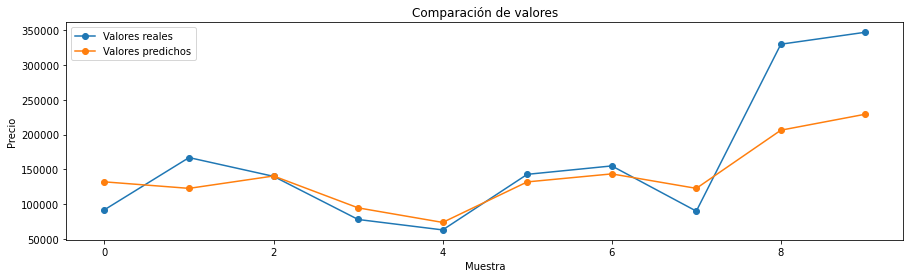

In [35]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.title('Comparación de valores')
plt.xlabel('Muestra')
plt.ylabel('Precio')

El grafico me proporciona una representación visual de la cercania de los valores predichos y los valores reales. De esta manera me es mas comodo y facil ver el desempeño del modelo.

# Inicio Proyecto 2

PARTE A - Transformación de Datos

Las siguientes tareas son apropiadas para mi dataset.

    - Detección y eliminación de Outliers : Realizare detección y eliminación de Outliers ya que el contar con valores atipicos en mi Data, afectara al momento de realizar las prediccónes por el modelo.Ya que algunos valores estaran muy elevados y fuera de rango o por el contrario los valores de la propiedad puedes ser demasido bajo y el modelo puede realizar predicciones erroneas.

    - Encoding: Realizare Encoding de Variables Categoricas, como lo es los tipos de Barrios presente en la columna L3, esta informacion puede influir en mejorar el rendimiento al momento de realizar las predicciones.Ya que al ser una varible categorica, esta previamente se dercartaba. El convertirla a una variable numerica esta puede afectar positivamente al modelo ya que este cuenta con mayor informacion en la cual se basa para realizar las predicciones.

    - Imputación de valores faltantes: Los valores faltantes, no representan un gran porcetaje del total de mi Dataset, sin embargo realizo la imputacion con el fin de tener una Data completa y evitar eliminar filas con valores posiblemente relevantes para el modelo. La Tecnica que empleare para la imputacion de valores faltantes sera la imputacion con la media de los valores.

    - Escalado de datos: Realizare el escalado de datos con el fin de establecer todos mis datos dentro de un mismo rango de valores y optimizar el rendimiento del modelo.

    - Reducción de dimensionalidad (SVD/PCA): Ya que al aplicar Encoding del tipo de barrios, las dimeciones de mi Dataset aumentaria, realizo una reduccion de Dimencionalidad y contar con una nueva Data de menor tamaño pero que aun siga contando con la inforcion indispensable.

# Imputacion de valores faltantes

Para la imputación de valores faltantes, empleare mi DataSet proveniente del proyecto 1, ya que este Dataset no cuenta con valores nulos, ni valores atipicos. Empleare esta informacion para realizar el calculo de la media de las columnas que presentan valores nulos en mi Dataset de trabajo del proyecto 2

In [36]:
'''Obtengo los valores nulos por columna de mi Dataset de trabajo del Proyecto 2'''
data_py2.isnull().sum()

l3                   0
property_type        0
rooms                0
bathrooms          703
surface_total        0
surface_covered      0
price                0
dtype: int64

In [37]:
'''Obtengo el valor de la media de bathrooms en funcion del tipo de propiedad'''
mean_bt = data_ml.groupby('property_type')['bathrooms'].mean().round(0)

In [38]:
'''Convierto a diccionario'''
mean_bt = dict(round(mean_bt))
mean_bt

{'Casa': 2.0, 'Departamento': 1.0, 'PH': 1.0}

In [39]:
'''Realizo la imputacion de valores faltantes a mi dataset de trabajo con valores nulos'''
data_py2.bathrooms = data_py2.bathrooms.fillna(data_py2.property_type.map(mean_bt))

In [40]:
'''Compruebo la no exitencia de valores nulos en bathrooms'''
data_py2.isnull().sum()

l3                 0
property_type      0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

Una vez finalizada la imputacion de valores faltantes, continuo con la eliminaion de outliers a mis Dataset de trabajo

# Eliminacion de Outliers

Realizo la eliminacion de Outliers en mi DataSet de trabajo del proyecto 2

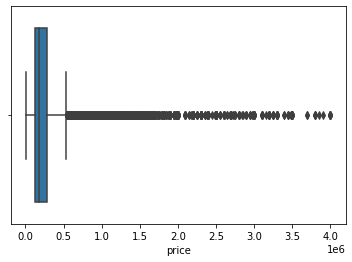

In [41]:
'''Corroboró la presencia de Outliers '''
sns.boxplot(x='price', data= data_py2)

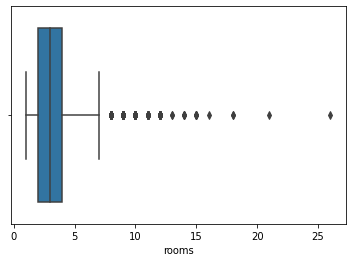

In [42]:
'''Corroboró la presencia de Outliers '''
sns.boxplot(x='rooms', data= data_py2)

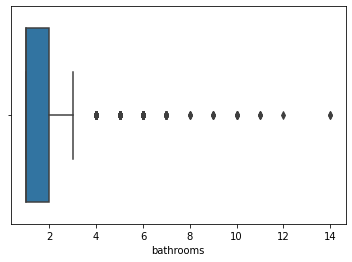

In [43]:
'''Corroboró la presencia de Outliers '''
sns.boxplot(x='bathrooms', data= data_py2)

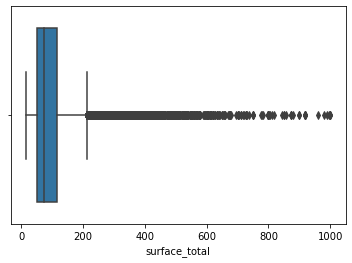

In [44]:
'''Corroboró la presencia de Outliers '''
sns.boxplot(x='surface_total', data= data_py2)

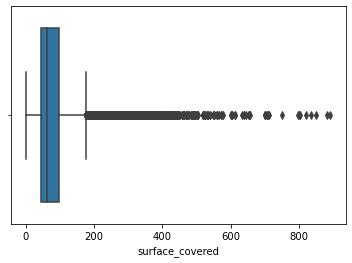

In [45]:
'''Corroboró la presencia de Outliers '''
sns.boxplot(x='surface_covered', data= data_py2)

In [46]:
'''Empleo la misma funcion para realizar la limpieza de valores nulos'''
'''Aplico la limpieza de Outliers a las columnas de interes'''
data_columnas = ['rooms','bathrooms','surface_total','surface_covered','price']
for i in data_columnas:
    data_py2 = limpiar_dataframe(data_py2,i)

In [47]:
'''Reseteo el index'''
data_py2.reset_index(drop=True, inplace=True)

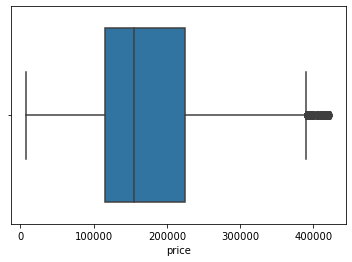

In [48]:
'''Corroboró la eliminación de Outliers '''
sns.boxplot(x='price', data= data_py2)

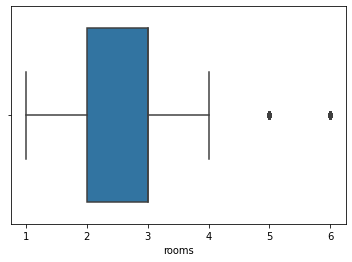

In [49]:
'''Corroboró la eliminación de Outliers '''
sns.boxplot(x='rooms', data= data_py2)

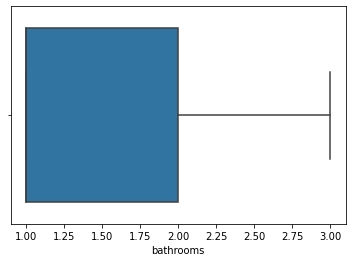

In [50]:
'''Corroboró la eliminación de Outliers '''
sns.boxplot(x='bathrooms', data= data_py2)

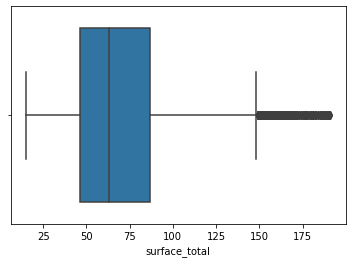

In [51]:
'''Corroboró la eliminación de Outliers '''
sns.boxplot(x='surface_total', data= data_py2)

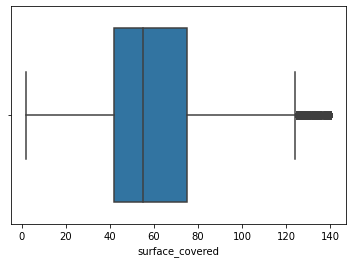

In [52]:
'''Corroboró la eliminación de Outliers '''
sns.boxplot(x='surface_covered', data= data_py2)

# Encoding

Realizo Encoding al tipo de propiedades presentes en el Dataset

In [53]:
'''Enconding de variables categoricas de Interes'''
'''Pasar a binarios'''
columna = ['property_type']

for var in columna:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_py2[var], prefix=var)
    data_py2=data_py2.join(cat_list)

In [54]:
'''Eliminar columna de property_type'''
data_py2.drop(columns='property_type', inplace=True)
data_py2.reset_index(drop=True, inplace=True)

In [55]:
data_py2.head(2)

,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,Boedo,2.0,2.0,70.0,58.0,159000.0,0,0,1
1,Palermo,2.0,1.0,45.0,45.0,125000.0,0,0,1


# Ahora L3

In [56]:
'''Creacion de nuevas columnas binarias segun el tipo de l3'''
l3_get = pd.get_dummies(data_py2['l3'])

In [57]:
'''Visualizo la salida obtenida'''
l3_get.head(3)

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
'''Concateno el dataframe obtenido con mi dataframe de trabajo'''
data_py2 = pd.concat([data_py2, l3_get], axis=1)
data_py2.head(2)

,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,Abasto,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,Boedo,2.0,2.0,70.0,58.0,159000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Palermo,2.0,1.0,45.0,45.0,125000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
'''Elimino las columna encodeadas'''
data_py2.drop(columns=['l3',], inplace=True)
data_py2.reset_index(drop=True, inplace=True)

In [60]:
'''Separo en X e Y, para re entrenar el modelo de Arbol de proyecto 1, con la nueva Data'''
x = data_py2.drop(['price'],axis=1) 
y = data_py2[['price']]

In [61]:
'''Separo como XDEV mi dataset de trabajo, para posteriormente realizar PCA'''
xdev = data_py2.drop(['price'], axis=1)

In [62]:
xdev.shape, y.shape

((39163, 64), (39163, 1))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Reentrenar el modelo del proyecto 1 con la nueva data Encodeada

In [64]:
arbol_py1 = DecisionTreeRegressor(max_depth= 7, random_state=42)

In [65]:
'''Entreno al arbol'''
arbol_py1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [66]:
print ("R2 of DecisionTreeRegressor train:", arbol_py1.score(X_train,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, arbol_py1.predict(X_train))))

R2 of DecisionTreeRegressor train: 0.6881936962997708
RMSE train: 45443.16989334369


In [67]:
print ("R2 of DecisionTreeRegressor test:", arbol_py1.score(X_test,y_test) )
r2_py2 = arbol_py1.score(X_test,y_test) 
print('RMSE test:',np.sqrt(mean_squared_error(y_test, arbol_py1.predict(X_test))))

R2 of DecisionTreeRegressor test: 0.6808626964302864
RMSE test: 46175.838819565375


In [68]:
'''Tomo una muestra de X_test, con el fin de hacer mas visual el rendimiento'''
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([  774, 10848,  3093,  4472,  2067,  6590, 10634,  6776, 10371,
        5368])

In [69]:
muestra = X_test.iloc[idxs]

In [70]:
'''Realizo la prediccion'''
prediccion = arbol_py1.predict(muestra)
prediccion

array([107784.63360385, 254311.41875   , 186042.93402778, 194428.63586098,
       243481.41772152, 186042.93402778, 289055.09022556, 131749.08704997,
       186042.93402778,  89293.51533742])

In [71]:
valor_data = []
for i in idxs:
    valor_real = y.price.iloc[i]
    valor_data.append(valor_real)

In [72]:
'''Comparacion entre valores reales y valores predichos'''
i = 0
while i <= 9:
    print('valor real =',valor_data[i],' valor predicho', prediccion[i])
    i = i + 1

valor real = 110000.0  valor predicho 107784.63360384731
valor real = 195000.0  valor predicho 254311.41875
valor real = 84000.0  valor predicho 186042.93402777778
valor real = 260000.0  valor predicho 194428.63586097947
valor real = 174905.0  valor predicho 243481.41772151898
valor real = 319000.0  valor predicho 186042.93402777778
valor real = 250000.0  valor predicho 289055.0902255639
valor real = 275000.0  valor predicho 131749.08704997314
valor real = 350000.0  valor predicho 186042.93402777778
valor real = 185000.0  valor predicho 89293.51533742332


In [73]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,110000.0,107784.633604
1,195000.0,254311.418750
2,84000.0,186042.934028
3,260000.0,194428.635861
4,174905.0,243481.417722
5,319000.0,186042.934028
6,250000.0,289055.090226
7,275000.0,131749.087050
8,350000.0,186042.934028
9,185000.0,89293.515337


Text(0, 0.5, 'Precio')

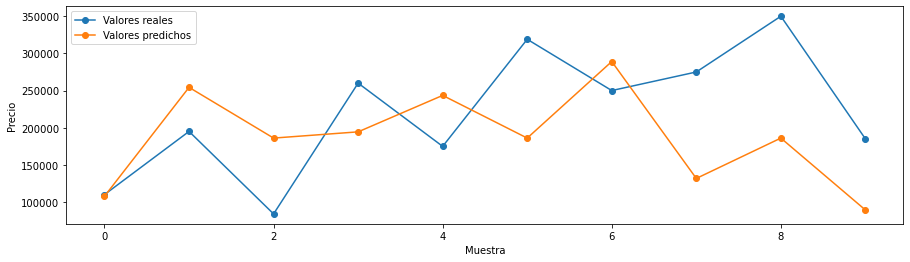

In [74]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.xlabel('Muestra')
plt.ylabel('Precio')

In [75]:
print('-----------------------------------------------')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py1)
print('-----------------------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos *')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py2)
print('-----------------------------------------------')

-----------------------------------------------
Valor de R2 en Test de Arbol Proyecto 1: 0.5350388799882471
-----------------------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos *
Valor de R2 en Test de Arbol Proyecto 1: 0.6808626964302864
-----------------------------------------------


Con base en el grafico, el modelo del proyecto 1 ahora este se acerca mas a los valores reales de las instancias. El valor de de R2 del Arbol de regresión mejoro con el procesamiento a la data, ya que ahora cuenta con una data mas mucho mas completa.

# Escalado de Datos

Empleo la Data proveniente de la eliminacion de Outliers y encodeado de tiposde propiedad

Separo las columnas de mi interes para escalar

In [76]:
X_dev2 = xdev[['rooms', 'bathrooms', 'surface_total','surface_covered',]]

Separo las columnas de barrios para despues concatenarlas

In [77]:
'''Separo los barrios encodeados para despues concatenarlos a la data escalda'''
l3_dev = xdev.drop(['rooms', 'bathrooms', 'surface_total','surface_covered'], axis=1)

In [78]:
'''Defino el modelo'''
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [79]:
'''Entreno el modelo'''
std.fit(X_dev2)

StandardScaler()

In [80]:
'''Realizo el escalado'''
X_dev = std.transform(X_dev2) 

In [81]:
'''Convierto a DataFrame la salida'''
X_dev = pd.DataFrame(data=X_dev, columns=['rooms', 'bathrooms','surface_covered','surface_total'])

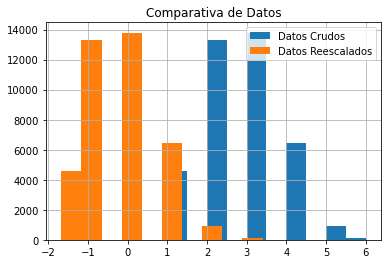

In [82]:
'''Visualizo la comparacion entre los datos crudos y los datos escalados'''
xdev.rooms.hist(label = 'Datos Crudos')
X_dev.rooms.hist(label = 'Datos Reescalados')
plt.title('Comparativa de Datos')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Rango de valores Datos Escalados')

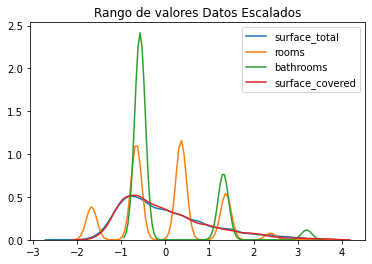

In [83]:
sns.kdeplot((X_dev['surface_total']))
sns.kdeplot((X_dev['rooms']))
sns.kdeplot((X_dev['bathrooms']))
sns.kdeplot((X_dev['surface_covered']))
plt.title('Rango de valores Datos Escalados')

Ya que mis valores se encuentran todos en el mismo rango, el escalado es correcto

In [84]:
'''Entreno el modelo para y(price)'''
std.fit(y)
y_dev = std.transform(y)       #Datos de desarrolo
'''Convierto a DataFrame'''
y_dev = pd.DataFrame(data=y_dev, columns=['price'])

In [85]:
X_dev.shape, y_dev.shape

((39163, 4), (39163, 1))

In [86]:
l3_dev.shape

(39163, 60)

In [87]:
l3_dev.reset_index(inplace=True, drop= True)

In [88]:
'''Concateno mis datos Escalados con los valores de los Barrios encodeados'''
X_devnew = pd.concat([X_dev, l3_dev], axis=1, join='inner')

In [89]:
X_devnew.shape, y_dev.shape

((39163, 64), (39163, 1))

# Entreno modelo 1

Entreno el modelo del arbol 1, con mi dataset con los datos ya escalados

In [90]:
X_train,X_test,y_train, y_test = train_test_split(X_devnew,y_dev, test_size=0.30, random_state=42)

In [91]:
arbol_py1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [92]:
print ("R2 of DecisionTreeRegressor train:", arbol_py1.score(X_train,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, arbol_py1.predict(X_train))))

R2 of DecisionTreeRegressor train: 0.6881936962997707
RMSE train: 0.5576615808242896


In [93]:
print ("R2 of DecisionTreeRegressor test:", arbol_py1.score(X_test,y_test) )
r2_py3 = arbol_py1.score(X_test,y_test)
print('RMSE test:',np.sqrt(mean_squared_error(y_test, arbol_py1.predict(X_test))))

R2 of DecisionTreeRegressor test: 0.6808626964302864
RMSE test: 0.5666526197983878


In [94]:
'''Tomo una muestra de mi X_train'''
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([ 7828,  4253,  8133,  3759,  8849, 10321,  4817,  7348,  8490,
        6952])

In [95]:
muestra = X_test.iloc[idxs]

In [96]:
'''Realizo la prediccion'''
prediccion = arbol_py1.predict(muestra)
prediccion

array([ 1.82284229, -1.05459068, -0.12744208, -0.26787676,  0.23558819,
       -1.05459068, -1.05459068, -0.12744208,  1.60075523, -0.73546829])

In [97]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [98]:
'''Comparacion entre valores reales y valores predichos'''
i = 0
while i <= 9:
    print('valor real =',valor_data[i],' valor predicho', prediccion[i])
    i = i + 1

valor real = 2.144701770483641  valor predicho 1.8228422881331496
valor real = -1.2299953531239853  valor predicho -1.054590680049643
valor real = 0.04625374089489887  valor predicho -0.12744207845947814
valor real = -0.2850801585138499  valor predicho -0.2678767637919202
valor real = 0.7948229210405905  valor predicho 0.23558818839030604
valor real = -0.9232047055232919  valor predicho -1.054590680049643
valor real = -0.9244318681136947  valor predicho -1.054590680049643
valor real = 0.48803227343989725  valor predicho -0.12744207845947814
valor real = 0.5493904029600358  valor predicho 1.600755225071002
valor real = -0.8495872217250295  valor predicho -0.7354682945293086


In [99]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,2.144702,1.822842
1,-1.229995,-1.054591
2,0.046254,-0.127442
3,-0.285080,-0.267877
4,0.794823,0.235588
5,-0.923205,-1.054591
6,-0.924432,-1.054591
7,0.488032,-0.127442
8,0.549390,1.600755
9,-0.849587,-0.735468


Text(0, 0.5, 'Precio')

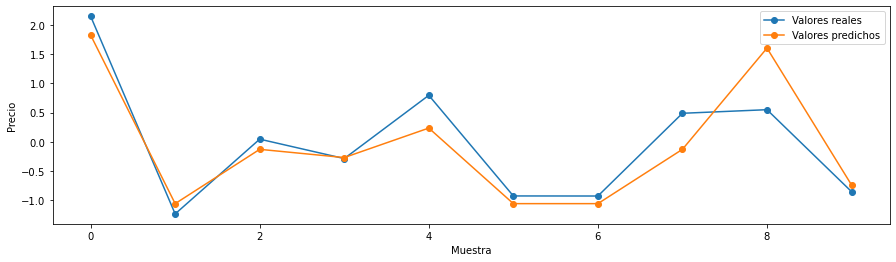

In [100]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.xlabel('Muestra')
plt.ylabel('Precio')

In [101]:
print('-----------------------------------------------')
print('Valor de R2 en Test de Arbol Proyecto1:', r2_py1)
print('-----------------------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos *')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py2)
print('-----------------------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos *')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py3)
print('-----------------------------------------------')

-----------------------------------------------
Valor de R2 en Test de Arbol Proyecto1: 0.5350388799882471
-----------------------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos *
Valor de R2 en Test de Arbol Proyecto 1: 0.6808626964302864
-----------------------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos *
Valor de R2 en Test de Arbol Proyecto 1: 0.6808626964302864
-----------------------------------------------


Al realizar el escalado de mi Data, el R2 del DecisionTreeRegressor no cambia, por lo que el modelo de DecisionTreeRegressor no es sensible al escalado.

# PCA

Empleo mi data con los datos escalados

In [102]:
from sklearn.decomposition import PCA

In [103]:
'''Realizo un for para comprobar mi mejor numero de n_components'''

for i in range(1,40,2):

    pca = PCA(n_components=i, random_state=40)

    X_nuevo = pca.fit_transform(X_devnew)

    print('n_components=:', i,'varianza:', pca.explained_variance_ratio_.sum())

n_components=: 1 varianza: 0.5866774527493518
n_components=: 3 varianza: 0.760816621794281
n_components=: 5 varianza: 0.8180746196925182
n_components=: 7 varianza: 0.8498540905404761
n_components=: 9 varianza: 0.8744014268291459
n_components=: 11 varianza: 0.8941327612743639
n_components=: 13 varianza: 0.9094690986868856
n_components=: 15 varianza: 0.9217984546533193
n_components=: 17 varianza: 0.9304297182491034
n_components=: 19 varianza: 0.9374017488569519
n_components=: 21 varianza: 0.9435637436293564
n_components=: 23 varianza: 0.9493542455553554
n_components=: 25 varianza: 0.9543838896922233
n_components=: 27 varianza: 0.9588884815113129
n_components=: 29 varianza: 0.9631468563314473
n_components=: 31 varianza: 0.9672449403136708
n_components=: 33 varianza: 0.9710274643486901
n_components=: 35 varianza: 0.9745883729705501
n_components=: 37 varianza: 0.9780100138347552
n_components=: 39 varianza: 0.9812470105040623


Veo que con un numero de n_components = 25 sobre mi Data con Datos escalados y los tipos de barrios encodeados, obtengo el 0.95 de varianza, con lo cual decido emplear este para reducir mi dataset a 25 columnas

Este es solo para ver si es viable reducir solo los tipos de barrio, en almenos 3 columnas.

In [104]:
'''Realizo un for para comprobar mi mejor numero de n_components'''

for i in range(1,40,2):

    pca = PCA(n_components=i, random_state=40)

    X_nuevo = pca.fit_transform(l3_dev)

    print('n_components=:', i,'varianza:', pca.explained_variance_ratio_.sum())

n_components=: 1 varianza: 0.18099165677025256
n_components=: 3 varianza: 0.33733127293225373
n_components=: 5 varianza: 0.44694674256919575
n_components=: 7 varianza: 0.5340077601319959
n_components=: 9 varianza: 0.6014948236110733
n_components=: 11 varianza: 0.6558438171704919
n_components=: 13 varianza: 0.6939204296941891
n_components=: 15 varianza: 0.7245238783754393
n_components=: 17 varianza: 0.7518211171949866
n_components=: 19 varianza: 0.7775211357956529
n_components=: 21 varianza: 0.7995337755448849
n_components=: 23 varianza: 0.8194226491919827
n_components=: 25 varianza: 0.8380578691671396
n_components=: 27 varianza: 0.8558202048605213
n_components=: 29 varianza: 0.8725963052324942
n_components=: 31 varianza: 0.8884765250223638
n_components=: 33 varianza: 0.9034041747400335
n_components=: 35 varianza: 0.9175685246479938
n_components=: 37 varianza: 0.9303230484115717
n_components=: 39 varianza: 0.9423461418169429


Ya que no es muy viable reducir los tipos de barrios encodeados, decido no hacer esta reduccion de dimenciones sobre los tipos de barrios unicamente

In [105]:
pca = PCA(n_components=25, random_state=42)

In [106]:
'''Reduccion de dimenciones'''
X_devPCA = pca.fit_transform(X_devnew)

In [107]:
'''Convierto a DataFrame '''
X_devPCA = pd.DataFrame(data=X_devPCA)

# Reentreno arbol 1

Reentreno el arbol con mi Dataset con los datos escalados al cual le realice reduccion de dimencionalidad

In [108]:
X_train,X_test,y_train, y_test = train_test_split(X_devPCA,y_dev, test_size=0.30, random_state=42)

In [109]:
arbol_py1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [110]:
print ("R2 of DecisionTreeRegressor train:", arbol_py1.score(X_train,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, arbol_py1.predict(X_train))))

R2 of DecisionTreeRegressor train: 0.7366331809852784
RMSE train: 0.5125176299919383


In [111]:
print ("R2 of DecisionTreeRegressor test:", arbol_py1.score(X_test,y_test) )
r2_py4 = arbol_py1.score(X_test,y_test)
print('RMSE test:',np.sqrt(mean_squared_error(y_test, arbol_py1.predict(X_test))))

R2 of DecisionTreeRegressor test: 0.7067876338919206
RMSE test: 0.543149340557075


In [112]:
'''Obtengo una muestra sobre mi data'''
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([ 7554,  9490,  2788,   419,  9204, 10110,  5135,  9207,  9356,
         465])

In [113]:
muestra = X_test.iloc[idxs]

In [114]:
'''Realizo la prediccion de las muestras obtenidas'''
prediccion = arbol_py1.predict(muestra)
prediccion

array([ 1.3681276 , -1.05474339,  0.08782198, -0.78389907,  0.76196247,
       -0.6606282 ,  1.41563951,  0.84134541, -0.5151424 ,  1.49964899])

In [115]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [116]:
'''Comparacion entre valores reales y valores predichos'''
i = 0
while i <= 9:
    print('valor real =',valor_data[i],' valor predicho', prediccion[i])
    i = i + 1

valor real = 1.6538367343225318  valor predicho 1.3681276008866894
valor real = -1.2299953531239853  valor predicho -1.0547433870438585
valor real = -0.5673275543064877  valor predicho 0.08782198081636668
valor real = -0.3722087024324468  valor predicho -0.7838990693604325
valor real = 0.3039578848794812  valor predicho 0.7619624679335669
valor real = -0.3341666621299608  valor predicho -0.6606281961628071
valor real = 0.14442674812712072  valor predicho 1.4156395084386781
valor real = 1.4084042162419772  valor predicho 0.8413454139124033
valor real = -1.1809088495078743  valor predicho -0.5151424031717012
valor real = 1.1016135686412838  valor predicho 1.499648989884362


In [117]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,1.653837,1.368128
1,-1.229995,-1.054743
2,-0.567328,0.087822
3,-0.372209,-0.783899
4,0.303958,0.761962
5,-0.334167,-0.660628
6,0.144427,1.415640
7,1.408404,0.841345
8,-1.180909,-0.515142
9,1.101614,1.499649


Text(0, 0.5, 'Precio')

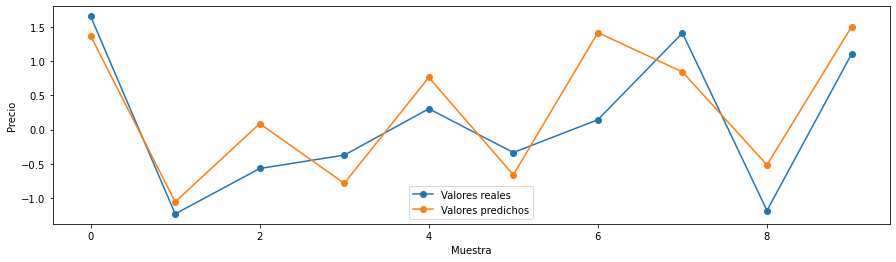

In [118]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.xlabel('Muestra')
plt.ylabel('Precio')

Con base en el grafico , las predicciones de los valores ahora se acercan mucho mas a los valores reales de las propiedades

In [119]:
print('-----------------------------------------------')
print('Valor de R2 en Test de Arbol Proyecto1:', r2_py1)
print('-----------------------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos *')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py2)
print('-----------------------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos *')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py3)
print('-----------------------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos, PCA *')
print('Valor de R2 en Test de Arbol Proyecto 1:', r2_py4)
print('-----------------------------------------------')

-----------------------------------------------
Valor de R2 en Test de Arbol Proyecto1: 0.5350388799882471
-----------------------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos *
Valor de R2 en Test de Arbol Proyecto 1: 0.6808626964302864
-----------------------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos *
Valor de R2 en Test de Arbol Proyecto 1: 0.6808626964302864
-----------------------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos, PCA *
Valor de R2 en Test de Arbol Proyecto 1: 0.7067876338919206
-----------------------------------------------


EL valor de R2 Presenta una leve mejora al implementar PCA en la Data escalada.

CONCLUSIÓN:
Al realizar la transformación de la data, realizando sus adecuaciones, estos afectaron positivamente al modelo , ya que este presento mejoras en la R2 . El modelo de DecisionTreeRegressor no muestra sensibilidad al Escalado de Datos. si se aplicara un modelo sensible a esta modificación posiblemente la R2 mejorara considerablemte.

`X_devnew` = Mi Data encodeada y escalada

`X_devPCA` = Mi data encodeada y escalado con PCA

In [120]:
X_devnew.head(2)

,rooms,bathrooms,surface_covered,surface_total,property_type_Casa,property_type_Departamento,property_type_PH,Abasto,Agronomía,Almagro,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-0.656376,1.314981,-0.002304,-0.119265,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.656376,-0.573143,-0.791778,-0.638243,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X_devPCA.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.213923,1.159837,0.797408,1.261552,-0.009323,-0.368768,-0.048985,0.011021,-0.003067,0.019805,...,-0.084624,-0.035208,-0.074112,-0.023229,-0.110305,-0.022391,-0.007757,0.102185,-0.399565,0.832191
1,-1.258291,-0.239158,0.331176,1.075729,0.965037,-0.471185,-0.007067,0.239398,0.073920,0.079339,...,0.087673,0.021596,-0.006637,0.019365,0.010641,-0.003233,0.004953,-0.016991,0.017398,-0.005868


# Parte B

# LinearRegression

Para entrenar el modelo de Regresión Lineal , empleare mi Data con los valores escalados y con reducción de dimencionalidad.

In [122]:
X_train,X_test,y_train, y_test = train_test_split(X_devPCA,y_dev, test_size=0.30, random_state=42)

In [123]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [124]:
reg1.fit(X_train,y_train)

LinearRegression()

In [125]:
print ("R2 of Linear Regresson train:", reg1.score(X_train,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, reg1.predict(X_train))))

R2 of Linear Regresson train: 0.6973415408586496
RMSE train: 0.5494202831661813


In [126]:
print ("R2 of Linear Regresson test:", reg1.score(X_test,y_test) )
r2_lr = reg1.score(X_test,y_test)
print('MSE train: ',mean_squared_error(y_train, reg1.predict(X_train)))
error_rl = mean_squared_error(y_test, reg1.predict(X_test))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, reg1.predict(X_test))))

R2 of Linear Regresson test: 0.7056031967733991
MSE train:  0.3018626475544069
RMSE test: 0.5442452661400173


Ya que el R2 de mi modelo de Regresion Lineal no es muy bueno, empleo PolynomialFeatures para ver si este parametro mejora

# PolynomialFeatures

In [128]:
from sklearn.preprocessing import PolynomialFeatures

Aplico el polynomialFeatures a mi Dataset con PCA con valores escalados y encodeados

In [129]:
'''Definir y entrenar el modelo'''
poly = PolynomialFeatures(2, include_bias=False) 
X_dev_PCA_new = poly.fit_transform(X_devPCA)

In [130]:
'''Nueva particial de la Data con Polynomial Features'''
X_train_new,X_test_new,y_train,y_test = train_test_split(X_dev_PCA_new,y_dev, test_size=0.30, random_state=40)

In [131]:
'''Traer el modelo y entrenar'''
reg_2 = LinearRegression()
reg_2.fit(X_train_new, y_train)

LinearRegression()

In [132]:
print ("R2 of Linear Regresson train:", reg_2.score(X_train_new,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, reg_2.predict(X_train_new))))

R2 of Linear Regresson train: 0.782488704421099
RMSE train: 0.4659186316114584


In [134]:
print ("R2 of Linear Regresson test:", reg_2.score(X_test_new,y_test) )
r2_pl = reg_2.score(X_test_new,y_test)
r2_lr = reg1.score(X_test,y_test)
print('MSE train: ',mean_squared_error(y_test, reg_2.predict(X_test_new)))
error_pl = mean_squared_error(y_test, reg_2.predict(X_test_new))
print('RMSE test:',np.sqrt(mean_squared_error(y_test, reg_2.predict(X_test_new))))

R2 of Linear Regresson test: 0.7775585899562415
MSE train:  0.22342865494278644
RMSE test: 0.4726824038853006


In [135]:
print('----------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos, PCA *')
print('Valor de R2 con DecisionTreeRegressor:', r2_py4) 
print('----------------------------------')
print('Valor de R2 con LinearRegression:', r2_lr)
print('----------------------------------')
print('Valor de R2 de LinearRegression con PolynomialFeatures(2):', r2_pl)
print('----------------------------------')

----------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos, PCA *
Valor de R2 con DecisionTreeRegressor: 0.7067876338919206
----------------------------------
Valor de R2 con LinearRegression: -0.7036957645022439
----------------------------------
Valor de R2 de LinearRegression con PolynomialFeatures(2): 0.7775585899562415
----------------------------------


Al aplicar PolynomialFeatures con un `degree=2`, las dimenciones del dataset aumentaron considerablemete. El R2 mejoro considerablemente al emplear PolynomialFeatures

# Regularizacion

In [136]:
from sklearn.linear_model import Ridge, Lasso

Para el caso de Regularización decido probar `Ridge` y `Lasso` y comparar cual me da mejor `R2`, a su vez buscando el mejor valor para `alpha`

# Ridge

In [137]:
'''Realizo un for para comprobar que numero en alpha me arroja mejor R2'''
alpha = [1, 0.5, 0.1 ,0.01, 0.005, 0.001, 0.0001]

for i in alpha:
    reg_ridge = Ridge(alpha= i)
    reg_ridge.fit(X_train_new,y_train)
    print('Valor de alpha:', i)
    print ("R2 of Ridge test:", reg_ridge.score(X_test_new,y_test) )
    print('RMSE test:',np.sqrt(mean_squared_error(y_test, reg_ridge.predict(X_test_new))))
    print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')

Valor de alpha: 1
R2 of Ridge test: 0.7447895170757989
RMSE test: 0.5063034310794745
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.5
R2 of Ridge test: 0.7456687459432629
RMSE test: 0.5054305424490589
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.1
R2 of Ridge test: 0.7490611350606649
RMSE test: 0.5020483920288068
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.01
R2 of Ridge test: 0.7656515815408699
RMSE test: 0.48516853704019935
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.005
R2 of Ridge test: 0.7700416661102553
RMSE test: 0.4806026847446666
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.001
R2 of Ridge test: 0.7740857752611441
RMSE test: 0.47635793555779526
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.0001
R2 of Ridge test: 0.7763697995391245
RMSE test: 0.4739437956958272
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


# Lasso

In [138]:
'''Realizo un for para comprobar que numero en alpha me arroja mejor R2'''
alpha = [1, 0.5, 0.1 ,0.01, 0.005, 0.001, 0.0001]

for i in alpha:
    reg_lasso = Lasso(alpha= i)
    reg_lasso.fit(X_train_new,y_train)
    print('Valor de alpha:', i)
    print ("R2 of Lasso  test:", reg_lasso.score(X_test_new,y_test) )
    print('RMSE test:',np.sqrt(mean_squared_error(y_test, reg_lasso.predict(X_test_new))))
    print('-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.')

Valor de alpha: 1
R2 of Lasso  test: 0.19902092617535116
RMSE test: 0.8969581922884903
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.5
R2 of Lasso  test: 0.45314663121943544
RMSE test: 0.74113455374742
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.1
R2 of Lasso  test: 0.5421693360456064
RMSE test: 0.6781317122722852
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.01
R2 of Lasso  test: 0.693050233214775
RMSE test: 0.5552585692604832
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.005
R2 of Lasso  test: 0.7183352953560074
RMSE test: 0.5318973545860158
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.001
R2 of Lasso  test: 0.7368904735910013
RMSE test: 0.5140790459991229
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
Valor de alpha: 0.0001
R2 of Lasso  test: 0.7427001454994019
RMSE test: 0.5083717232490482
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


La regularización con Ridge me arrojo un `R2` mayor aplicando un `alpha=0.0001`. Por lo que con base en esto, decido aplico Ridge como mi modelo de Regularización selecciónado

# Ridge

In [139]:
'''Defino y entreno el modelo'''
reg_ridge = Ridge(alpha=0.0001)
reg_ridge.fit(X_train_new,y_train)

Ridge(alpha=0.0001)


## Curva de validación

Realizo una busqueda rapida del mejor hyperparametro para alpha

In [140]:
R2_train = []
R2_test = []
alpha = [1, 0.5, 0.1 ,0.01, 0.005, 0.001, 0.0001]

for i in alpha:
    reg_ridge = Ridge(alpha= i)
    reg_ridge.fit(X_train_new, y_train)
    
    
    R2_train_ = reg_ridge.score(X_train_new,y_train) 
    R2_test_ = reg_ridge.score(X_test_new,y_test) 
    
    R2_train.append(R2_train_)
    R2_test.append(R2_test_)
    
R2_train = np.array(R2_train)
R2_test = np.array(R2_test)

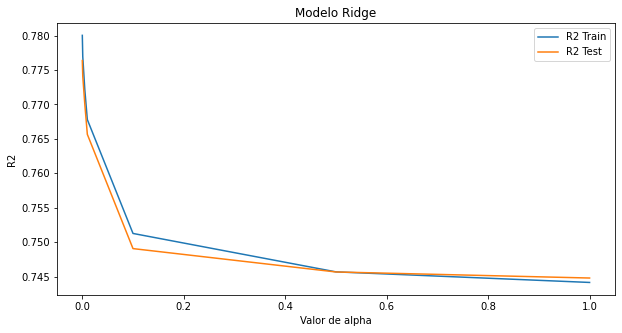

In [141]:
plt.figure(figsize=(10,5))
plt.plot(alpha,R2_train, label = 'R2 Train')
plt.plot(alpha,R2_test, label = 'R2 Test')
plt.legend()
plt.title('Modelo Ridge')
plt.ylabel('R2')
plt.xlabel('Valor de alpha')
plt.show()

Con base en el grafico, la Curva de Validación muestra que cuanto mas cercano sea el valor de alpha a `0`, el R2 no es relativamente distante en Train y Test

# Validación cruzada

In [142]:
from sklearn.model_selection import cross_val_score

In [143]:
'''Defino el modelo con el valor del alpha'''
reg_ridge = Ridge(alpha=0.0001)

In [144]:
'''Validacion cruzada'''
ridge_scores = cross_val_score(reg_ridge, X_dev_PCA_new, y_dev, cv=5)

In [145]:
print(ridge_scores)
print("Accuracy para Ridge: %0.2f (+/- %0.2f)" % (ridge_scores.mean(), ridge_scores.std() * 2))

[0.77371779 0.78035974 0.6751702  0.77002025 0.7778026 ]
Accuracy para Ridge: 0.76 (+/- 0.08)


Mi modelo de Ridge no depende de la particion de la Data para su entrenamiento o Test, por lo que este no tiene gran variacion y su rendimiento no se ve afectado por estas particiones de la data

# Curva de Validación con validación cruzada

In [146]:
from sklearn.model_selection import cross_validate

In [147]:
reg_train_scores_mean = []
reg_train_scores_std = []
reg_test_scores_mean = []
reg_test_scores_std = []

alpha = [1, 0.5, 0.1 ,0.01, 0.005, 0.001, 0.0001]

for i in alpha:
    reg_ridge = Ridge(alpha= i)
    ridge_scores = cross_validate(reg_ridge, X_dev_PCA_new, y_dev, cv=5, return_train_score=True, n_jobs = -1)
    
    reg_train_scores_mean.append(ridge_scores['train_score'].mean())
    reg_train_scores_std.append(ridge_scores['train_score'].std())
    
    reg_test_scores_mean.append(ridge_scores['test_score'].mean())
    reg_test_scores_std.append(ridge_scores['test_score'].std())

reg_train_scores_mean = np.array(reg_train_scores_mean)
reg_train_scores_std = np.array(reg_train_scores_std)
reg_test_scores_mean = np.array(reg_test_scores_mean)
reg_test_scores_std = np.array(reg_test_scores_std)

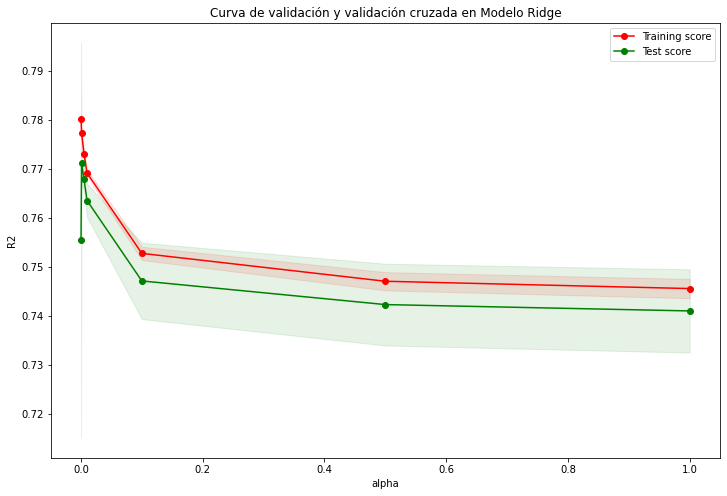

In [148]:
plt.figure(figsize=(12,8))
plt.fill_between(alpha, reg_train_scores_mean - reg_train_scores_std,
                 reg_train_scores_mean + reg_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(alpha, reg_test_scores_mean - reg_test_scores_std,
                 reg_test_scores_mean + reg_test_scores_std, alpha=0.1, color="g")
plt.plot(alpha, reg_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(alpha, reg_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.title('Curva de validación y validación cruzada en Modelo Ridge')
plt.ylabel('R2')
plt.xlabel('alpha')
plt.show()

Al realizar validacion cruzada, mi modelo Ridge no depende de la particion de la data, por lo que su desempeño no tiene grandes variaciones en funcion del split realizado.
Al establecer un valor de alpha muy cercano a 0 el R2 mejora, sin embargo al establecer alpha de 0, el R2 se ve muy afectado bajando significativamente.
Siendo `alpha= 0.001` el mejor valor , ya que el R2 es mas cercano en X_train y X_test

# GridSearchCV

In [149]:
from sklearn.model_selection import GridSearchCV

Parametros seleccionados:
- alpha: Alpha previamente obtuve su mejor valor, por lo que este valor no tiene cambios
- normalize: Este parametro realiza una normalizacion de los datos, por lo que realiza un ajuste en los Datos, si previamente los datos se escalaron erroneamente, este los puede llegar a correguir. Decido probarlo con True para comprobar si el normalizar los datos que previamente escale y con Polynomial Feature este mejora su rendimiento,
- fit_intercept : Centra los datos de X e Y, realizando un mejor ajuste para la linealidad, Intento probar el True para ver si al realizarce el rendimiento mejor o con False para comprobar que el emplear este parametro no afecta.
- solver : Decido probar con 3 diferente parametros, en donde auto seleccionara de toda la lista de posibles opciones, lsqr  utiliza la rutina dedicada de mínimos cuadrados regularizados, ya que este es mas rapido.
- max_iter : Ya que este es el numero de iteracciones, decio porbar con un rango pequeño de numeros al azar
- random_state : Empleo este parametro unicamente para jugar con los diferentes valores pero sin que llegue a ser importante este valor

In [150]:
param_dist = {'alpha':np.array([0.0001]),
              'normalize': [False,True],
              'fit_intercept': [False,True],
              'solver' : ['auto', 'lsqr' , 'cholesky'],
              'max_iter': np.arange(1,50,5),
              'random_state': np.arange(1,50,5),}

In [151]:
model = GridSearchCV(reg_ridge, param_grid=param_dist, cv=5)

In [152]:
model.fit(X_train_new,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.0001),
             param_grid={'alpha': array([0.0001]),
                         'fit_intercept': [False, True],
                         'max_iter': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                         'normalize': [False, True],
                         'random_state': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46]),
                         'solver': ['auto', 'lsqr', 'cholesky']})

In [153]:
print("Mejores parametros : "+str(model.best_params_))
print("Mejor Score : "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(2)

Mejores parametros : {'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 1, 'normalize': False, 'random_state': 1, 'solver': 'auto'}
Mejor Score : 0.7633803052815329



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_max_iter,param_normalize,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.628637,0.098206,0.011479,0.000136,0.0001,False,1,False,1,auto,"{'alpha': 0.0001, 'fit_intercept': False, 'max...",0.755474,0.770466,0.733838,0.779975,0.763358,0.760622,0.015639,201
1,0.173409,0.000922,0.011132,0.000140,0.0001,False,1,False,1,lsqr,"{'alpha': 0.0001, 'fit_intercept': False, 'max...",0.184961,0.200528,0.196627,0.211398,0.191401,0.196983,0.008901,1181


In [154]:
'''Defino los mejores parametros en mi modelo'''
reg_ridge = Ridge(alpha = 0.0001, fit_intercept = True,
                  max_iter = 1, normalize = False,
                  random_state = 1, solver = 'auto')

In [155]:
'''Entreno  modelo'''
reg_ridge.fit(X_train_new, y_train)

Ridge(alpha=0.0001, max_iter=1, random_state=1)

In [156]:
print ("R2 of Ridge train:", reg_ridge.score(X_train_new,y_train) )
print('RMSE train:',np.sqrt(mean_squared_error(y_train, reg_ridge.predict(X_train_new))))

R2 of Ridge train: 0.7800312484541054
RMSE train: 0.4685432278679621


In [157]:
print ("R2 of Ridge test:", reg_ridge.score(X_test_new,y_test) )
r2_ridge = reg_ridge.score(X_test_new,y_test)
print('MSE train: ',mean_squared_error(y_test, reg_ridge.predict(X_test_new)))
error_ridge = mean_squared_error(y_test, reg_ridge.predict(X_test_new))
print('RMSE train:',np.sqrt(mean_squared_error(y_test, reg_ridge.predict(X_test_new))))

R2 of Ridge test: 0.7763697995391245
MSE train:  0.224622721478568
RMSE train: 0.4739437956958272


In [158]:
'''Convierto a DataFrame'''
X_train_new = pd.DataFrame(data=X_train_new)
X_test_new = pd.DataFrame(data=X_test_new)

In [159]:
idxs = np.random.randint(X_test_new.shape[0], size=10)
idxs

array([  931,  5028,   479, 10579,  5176,  3447,  7635,  2287,  4516,
        8785])

In [160]:
muestra = X_test_new.iloc[idxs]

In [161]:
prediccion = reg_ridge.predict(muestra)
prediccion

array([[ 0.59795   ],
       [ 1.35098509],
       [-1.40947639],
       [-0.67112162],
       [-1.30018837],
       [ 0.82870283],
       [-0.18714814],
       [ 0.81211393],
       [ 2.05652528],
       [-0.86936797]])

In [162]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [163]:
'''Comparacion entre valores reales y valores predichos'''
i = 0
while i <= 9:
    print('valor real =',valor_data[i],' valor predicho', prediccion[i])
    i = i + 1

valor real = 1.1138851945453117  valor predicho [0.59795]
valor real = 0.24259975535934258  valor predicho [1.35098509]
valor real = -1.4754278712045399  valor predicho [-1.40947639]
valor real = -0.43233966936218265  valor predicho [-0.67112162]
valor real = -0.9293405184753059  valor predicho [-1.30018837]
valor real = 2.009713885539336  valor predicho [0.82870283]
valor real = -0.35870991393801627  valor predicho [-0.18714814]
valor real = 0.2916862589754535  valor predicho [0.81211393]
valor real = 2.7582830656850277  valor predicho [2.05652528]
valor real = -1.0950074681796802  valor predicho [-0.86936797]


In [164]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,1.113885,0.597950
1,0.242600,1.350985
2,-1.475428,-1.409476
3,-0.432340,-0.671122
4,-0.929341,-1.300188
5,2.009714,0.828703
6,-0.358710,-0.187148
7,0.291686,0.812114
8,2.758283,2.056525
9,-1.095007,-0.869368


Text(0, 0.5, 'Precio')

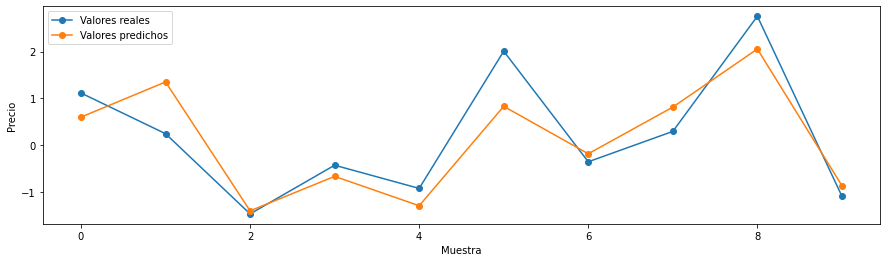

In [165]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.xlabel('Muestra')
plt.ylabel('Precio')

Al mejorar encontrar los mejores hiperparametros con GridSearchCV, el modelo realiza una mayor aproximacion a los valores reales.
La busqueda de los hiperparametros no es las ardua, debido a las limitaciones de computo de mi equipo, por lo tanto no se ve una notable mejoria al implementar GridSearchCv

In [166]:
print('----------------------------------')
print('* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos, PCA *')
print('Valor de R2 con DecisionTreeRegressor:', r2_py4) 
print('----------------------------------')
print('Valor de R2 con LinearRegression:', r2_lr)
print('----------------------------------')
print('Valor de R2 de LinearRegression con PolynomialFeatures(2):', r2_pl)
print('----------------------------------')
print('Valor de R2 de Ridge con GridSearchCV :', r2_ridge)
print('----------------------------------')

----------------------------------
* Eliminiación de Outliers, Encoding e Imputación de valores nulos, Escalado de datos, PCA *
Valor de R2 con DecisionTreeRegressor: 0.7067876338919206
----------------------------------
Valor de R2 con LinearRegression: -0.7036957645022439
----------------------------------
Valor de R2 de LinearRegression con PolynomialFeatures(2): 0.7775585899562415
----------------------------------
Valor de R2 de Ridge con GridSearchCV : 0.7763697995391245
----------------------------------


In [167]:
X_devnew.head(2)

,rooms,bathrooms,surface_covered,surface_total,property_type_Casa,property_type_Departamento,property_type_PH,Abasto,Agronomía,Almagro,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-0.656376,1.314981,-0.002304,-0.119265,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.656376,-0.573143,-0.791778,-0.638243,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
X_devnew.shape, y_dev.shape

((39163, 64), (39163, 1))

# Baggin

Para este modelo empleo mi Data con los Datos de `rooms, bathrooms, surface_total y surface_covered` escalados, tipos de propiedad y barrios encodeados

In [169]:
X_devnew.head(2)

,rooms,bathrooms,surface_covered,surface_total,property_type_Casa,property_type_Departamento,property_type_PH,Abasto,Agronomía,Almagro,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Real,Villa Riachuelo,Villa Santa Rita,Villa Soldati,Villa Urquiza,Villa del Parque
0,-0.656376,1.314981,-0.002304,-0.119265,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.656376,-0.573143,-0.791778,-0.638243,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_devnew, y_dev, test_size=0.30, random_state=42)

In [171]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

Decido buscar manualmente el mejor parametro para `n_estimators` , ya que en intento previos, al emplear diversos parametros mi computadora colapsa, por lo que decido realizar la busqueda de los hiperparametros por separado para disminuir la carga de procesamiento.

In [172]:
estimator = [3,5,8,10,20,30]

for i in estimator:
    reg_bgg = BaggingRegressor(base_estimator=KNeighborsRegressor(),
                           n_estimators=i, bootstrap_features=True)
    reg_bgg.fit(X_train, y_train)
    
    print('n_estimators:', i)
    print ("R2 of KNeighborsRegressor test:", reg_bgg.score(X_test,y_test) )
    print('RMSE train:',np.sqrt(mean_squared_error(y_test, reg_bgg.predict(X_test))))
    print('-------------------------------')

n_estimators: 3
R2 of KNeighborsRegressor test: 0.7376271517704376
RMSE train: 0.5137922631782692
-------------------------------
n_estimators: 5
R2 of KNeighborsRegressor test: 0.7559686083123289
RMSE train: 0.49550833437913644
-------------------------------
n_estimators: 8
R2 of KNeighborsRegressor test: 0.7679951406144294
RMSE train: 0.4831440728112007
-------------------------------
n_estimators: 10
R2 of KNeighborsRegressor test: 0.7728069843727222
RMSE train: 0.4781075516715803
-------------------------------
n_estimators: 20
R2 of KNeighborsRegressor test: 0.7698987000347718
RMSE train: 0.48115793399978374
-------------------------------
n_estimators: 30
R2 of KNeighborsRegressor test: 0.7714488450882815
RMSE train: 0.4795344641960286
-------------------------------


Empleando `n_estimators=30` obtengo el mayor R2 en mis datos de Test, por lo que decido emplear este valor fijo en GridSearchCV

In [173]:
reg_bgg = BaggingRegressor(base_estimator=KNeighborsRegressor(),
                           n_estimators=30, bootstrap_features=True)

### Validacion cruzada

In [174]:
bgg_scores = cross_val_score(reg_bgg, X_train, y_train, cv = 5)

In [175]:
print(bgg_scores)
print("Accuracy para Baggin: %0.2f (+/- %0.2f)" % (bgg_scores.mean(), bgg_scores.std() * 2))

[0.76660805 0.77644249 0.77047846 0.76020659 0.75837247]
Accuracy para Baggin: 0.77 (+/- 0.01)


Mi modelo de Baggin empleando como base a KNeighborsRegressor con sus valores por default, este no depende de las particiones realizadas para su entrenamiento, presentando una minima variacion en su rendimiento.

# Encontrar mejor hiperparametros
### GridSearchCV

In [176]:
reg_bgg = BaggingRegressor(base_estimator=KNeighborsRegressor(),
                           n_estimators=30, bootstrap_features=True)

Previamente realize la busqueda del mejor `n_estimators` con el maximo posible para la capacidad de procesamiento de mi equipo, por lo que esta busqueda empleando GridSearchCV, empleo parametros sencillos

- n_estimators : Previamente realize una busqueda rapida del mejor numero de estimadores, hasta donde fue posible para mi equipo de computo, este parametro es importante ya que al tener pocos estimadores el modelo no puede ser tan preciso al realizar las predicciones o por el contrario si se tiene un numero exagerado de estimadores se corre el riego de llegar al overfiting.

- bootstrap : Decido emplear este hiperparametro, ya que con esto el modelo selecciona si realiza la toma de muestras al azar realizando su remplazo de esta muestra.

- bootstrap_features : Su valor por default es False, por lo que decido realizar al prueba si el desempeño mejora empleando True, realize una busqueda para internar comprender la funcionalidad de este hiperparametro sin embargo no fue muy precisa la informacion, por lo que decido internar si al cambiar a True el modelo muestra un mejor desempeño

- oob_score : Ya que oob_score toma una muestra fuera del bootstrap para realizar la evaluacion, decido que este parametro es importante, por lo que decido emplearlo para la busqueda del mejor hiperparametro

In [177]:
params_bg = {"n_estimators": [30],
             'bootstrap' : [True, False],
             'bootstrap_features': [True, False],
             'oob_score' : [True, False]}

In [178]:
model = GridSearchCV(reg_bgg, param_grid=params_bg, cv=5)

In [179]:
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(),
                                        bootstrap_features=True,
                                        n_estimators=30),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'n_estimators': [30], 'oob_score': [True, False]})

In [180]:
print("Mejores parametros : "+str(model.best_params_))
print("Mejor Score : "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(2)

Mejores parametros : {'bootstrap': True, 'bootstrap_features': True, 'n_estimators': 30, 'oob_score': False}
Mejor Score : 0.7663046648918803



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_bootstrap_features,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,304.547864,34.322023,158.609147,18.397916,True,True,30,True,"{'bootstrap': True, 'bootstrap_features': True...",0.759035,0.770722,0.765675,0.757433,0.766695,0.763912,0.004960,3
1,64.830164,4.762783,148.944133,8.586909,True,True,30,False,"{'bootstrap': True, 'bootstrap_features': True...",0.760283,0.774328,0.767109,0.760251,0.769552,0.766305,0.005449,1


In [181]:
'''Defino modelo'''
reg_bgg = BaggingRegressor(base_estimator=KNeighborsRegressor(),
                           n_estimators=30,bootstrap=True, bootstrap_features=True, oob_score= False)

In [182]:
'''Entreno modelo'''
reg_bgg.fit(X_train, y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(), bootstrap_features=True,
                 n_estimators=30)

In [183]:
print ("R2 of KNeighborsRegressor test:", reg_bgg.score(X_test,y_test) )
print('MSE train: ',mean_squared_error(y_test, reg_bgg.predict(X_test)))
error_baggin = mean_squared_error(y_test, reg_bgg.predict(X_test))
print('RMSE train:',np.sqrt(mean_squared_error(y_test, reg_bgg.predict(X_test))))

R2 of KNeighborsRegressor test: 0.7759767555983335
MSE train:  0.22539761338602646
RMSE train: 0.4747605853333093


In [184]:
'''Tomo una muestra de mi Datos en Test'''
idxs = np.random.randint(X_test.shape[0], size=10)
idxs

array([6246, 3158, 3860, 6610, 8132, 4381, 8732, 9186, 3848, 4053])

In [185]:
muestra = X_test.iloc[idxs]

In [186]:
prediccion = reg_bgg.predict(muestra)
prediccion

array([-8.49269059e-01, -4.26482668e-01, -8.86026997e-01,  9.90128465e-01,
        4.33473852e-01,  6.42152681e-04,  8.14989293e-01, -4.32054968e-01,
        7.38226182e-01,  6.91450835e-01])

In [187]:
valor_data = []
for i in idxs:
    valor_real = y_test.price.iloc[i]
    valor_data.append(valor_real)

In [188]:
'''Comparacion entre valores reales y valores predichos'''
i = 0
while i <= 9:
    print('valor real =',valor_data[i],' valor predicho', prediccion[i])
    i = i + 1

valor real = -0.9845628350434306  valor predicho -0.8492690593707578
valor real = -0.14886511097914207  valor predicho -0.4264826677507082
valor real = -0.9232047055232919  valor predicho -0.8860269967386465
valor real = 1.1507000722573948  valor predicho 0.9901284652500515
valor real = 0.2916862589754535  valor predicho 0.43347385183318027
valor real = 0.05852536679892661  valor predicho 0.0006421526806117961
valor real = 0.3039578848794812  valor predicho 0.814989292942876
valor real = -0.03964764043329525  valor predicho -0.43205496764120926
valor real = 0.5493904029600358  valor predicho 0.7382261823712145
valor real = 1.2856879572016997  valor predicho 0.691450834967029


In [189]:
valor_data = pd.DataFrame((valor_data), columns = ['valor_real'])
prediccion = pd.DataFrame((prediccion), columns = ['valor_predicho'])
comparacion = pd.merge(valor_data, prediccion, right_index=True, left_index=True)
comparacion

,valor_real,valor_predicho
0,-0.984563,-0.849269
1,-0.148865,-0.426483
2,-0.923205,-0.886027
3,1.150700,0.990128
4,0.291686,0.433474
5,0.058525,0.000642
6,0.303958,0.814989
7,-0.039648,-0.432055
8,0.549390,0.738226
9,1.285688,0.691451


Text(0, 0.5, 'Precio')

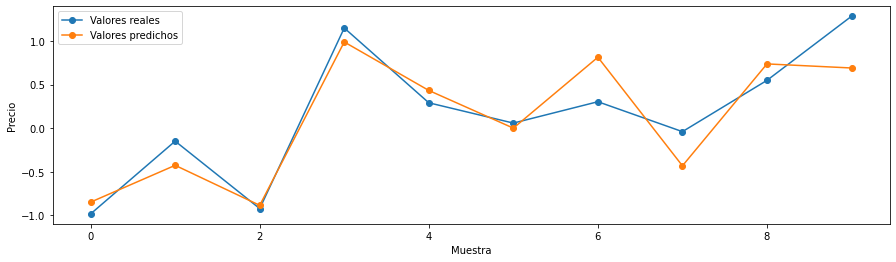

In [190]:
r = comparacion['valor_real']
p = comparacion['valor_predicho']
plt.figure(figsize=(15,4))
plt.plot(r,'o-',label='Valores reales')
plt.plot(p,'o-',label='Valores predichos')
plt.legend()
plt.xlabel('Muestra')
plt.ylabel('Precio')

Los valores predichos por el modelo BaggingRegressor, no se alejan tanto de los valores reales, mostrando una mayor relación entre ellos.

Al emplear BaggingRegressor tomando como `base_estimator=KNeighborsRegressor()` la R2 obtenido es buena, sin llegar a ser muy buena, esto se puede mejorar, posiblemente agregando mas `n_estimators` , teniendo en cuenta el limite para evitar que se llegue al overfiting. Sin embargo por las limitaciones en la capacidad de computo de mi equipo no me fue posible probar con mas `n_estimators` o realizar una mayor busqueda en los hiperparemtros.

# Parte C
### Interpretación de modelos.

Regresion Lineal
- Este es el primero modelo que implente , en donde obtuve el valor de R2 aplicado sobre mi datos de X_test, lo cual presenta una mejora en comparacion con mi modelo del proyecto 1

In [191]:
print('Regresion Lineal')
print('Valor de b:', reg1.intercept_)
print('Valor de R2:', r2_lr)

Regresion Lineal
Valor de b: [0.00085997]
Valor de R2: -0.7036957645022439


In [192]:
'''Valor de pendientes en Linear Regresor'''
reg1.coef_

array([[ 0.41695324,  0.14019584,  0.20477984, -0.53150872,  0.36533111,
         0.01436013, -0.21802351,  0.30778506,  0.49672424,  0.1446713 ,
        -0.18852816, -0.39189823,  0.607526  , -0.23548938,  0.28970559,
         0.64880262,  0.09683171,  0.14718331,  0.38721147,  0.69092921,
        -0.22759971, -0.16232056, -0.3876562 ,  0.11348961,  0.09612872]])

Posterior hice uso de PolynomialFeatures para comporbar si al emplear esta herramienta al agregar atributos polinomicos el R2 mejoraba. El cual fue el caso
Mostrando mejoria en el R2 del modelo evaluando sobre mis Datos de Test

In [193]:
print(' PolynomialFeatures con Regresion Lineal')
print('Valor de b:', reg_2.intercept_)
print('Valor de R2:', r2_pl)

 PolynomialFeatures con Regresion Lineal
Valor de b: [1.21000853e+09]
Valor de R2: 0.7775585899562415


In [194]:
'''Valor de pendientes con Linear Regreson y PolynomialFeatures'''
reg_2.coef_

array([[-9.19485798e+08, -2.93863177e+08,  8.86206748e+07,
         2.10018054e+09,  6.92821614e+10,  6.66436843e+09,
         3.13347953e+10, -8.37646283e+09, -4.00248535e+10,
        -2.26193679e+10, -9.07545525e+08,  3.92152256e+10,
        -3.21105187e+08,  2.64324241e+09,  8.09612799e+09,
         1.30740427e+10, -2.33427713e+09, -1.41766121e+10,
         1.46155359e+08, -7.65808265e+09,  9.25268076e+08,
        -1.93585511e+09,  6.89244456e+08,  3.26642362e+09,
         9.18839632e+08, -2.97411904e+06, -8.45791215e+07,
         6.56346819e+07,  1.50820088e+08, -1.57978861e+08,
        -2.74591349e+08, -8.35721387e+08, -1.37211109e+09,
         5.04030694e+08, -4.12118267e+08,  2.27791668e+08,
         1.43021214e+09, -4.19232751e+08,  8.77720438e+08,
         1.13420966e+09, -1.26509064e+09, -4.96218497e+08,
        -7.72987380e+08, -1.01340062e+08, -4.32585992e+08,
        -1.44638332e+08,  6.44520111e+07,  4.85494941e+08,
        -3.43814484e+08, -3.89644569e+08, -9.93739401e+0

Una vez comprobado que al emplear PolynomialFeatures el rendimiento del modelo mejora evualuando sobre mis datos de Test, empleo Regularizacion con Ridge, realizando la busqueda de sus mejores hiperparametros.La ventaja de emplear GreadSearchCv, es que este realiza una validacion cruzada, mi modelo Ridge bajo un poco al emplear GridSearch CV, sin embargo en mi primera prueba empleando Ridge este no contaba con validacin cruzada por lo que es posible que el R2 obtenido tenga variacion segun la particion de los datos. Al emplear GridSearchCv me aseguro que el R2 no depende de la particion de los datos.

In [195]:
print(' Modelo Ridge')
print('Valor de b:', reg_ridge.intercept_)
print('Valor de R2:', r2_ridge)

 Modelo Ridge
Valor de b: [-15.8618319]
Valor de R2: 0.7763697995391245


In [196]:
'''Valores de la pendiente en Ridge'''
reg_ridge.coef_

array([[ 3.00630162e-01, -7.31743050e+00, -7.56867273e+00,
         1.39548280e+01, -7.63418827e+01, -2.07357965e+01,
        -1.99855193e+00, -1.23936558e+02, -8.88118614e+01,
         3.44253957e+01,  6.30929038e+01,  8.98787091e+01,
        -4.86034602e+01, -1.14115495e+00, -1.22199926e+02,
        -2.24670546e+01,  2.68032589e+01, -3.56389154e+01,
        -4.82455511e+01,  4.32245845e+00,  3.10908486e+00,
        -1.54635334e+01, -2.81322577e+01, -2.44875490e+01,
         2.84880342e+01, -2.48474677e-02, -3.81193469e-02,
        -4.40748114e-02,  1.56454839e-01, -1.74562183e+00,
        -2.32199246e-02, -2.59695087e-01,  5.47263074e-01,
         6.40649990e-02,  4.24347281e-02,  4.03064647e-01,
        -2.86262666e-01,  1.25428899e-01,  1.01400432e+00,
         2.91927246e-01, -9.26690426e-01, -2.08900025e-01,
         1.87358193e-01, -1.71141523e-01, -4.61213863e-01,
        -2.20078132e-01, -9.26829740e-02,  3.37529403e-01,
         3.46003528e-01,  1.03519933e+00,  1.09971178e-0

Bagging

Para el Caso de Bagging empleo como `base_estimator` un KNeighborsRegressor con sus valores por defecto.Este modelo su optimizacion de vio muy afectado por la capacidad de computo de mi equipo, por lo que su optimizacion no es del todo optima y empleo pocos `n_estimator`
De igual manera que en modelo anterior de Regresion Lineal , realizo validacion cruzada antes del GridSearchCv, con el fin de optener una comparativa, la cual al emplear GridSearchCv, el rendimiento del modelo no se ve afectada por la particion de la Data en Train y Test

In [197]:
reg_bgg.estimators_[2]

KNeighborsRegressor()

Limitaciones
- Mi capacidad de computo se vio limitada en la optimizacon de hiperparametros, ya que me hubiera gustado probar con diferentes parametros y sus diferentes valores. En el caso de Bagging me hubiera gustado probar con mas n_estimator, ya que en un for para una busqueda rapida del mejor n_estimator, como un maximo de 30, ya que al agregar mas mi equipo colapsa, 30 obtuvo el mejor rendimiennto. Posiblemente al agregar mas n_estimadores, este rendimiendo mejoraria considerablemente.

## Errores

In [198]:
print('Mean-square error en Regresion Linal ',error_rl)
print('Mean-square error en Regresion con PolynomialFeatures',error_pl)
print('Mean-square error en Regresion con Ridge',error_ridge)
print('Mean-square error con Bagging',error_baggin)

Mean-square error en Regresion Linal  0.29620290971581825
Mean-square error en Regresion con PolynomialFeatures 0.22342865494278644
Mean-square error en Regresion con Ridge 0.224622721478568
Mean-square error con Bagging 0.22539761338602646


Mi modelo que presento un Mean-square error mas alto en primer lugar es la Regresion Lineal, siendo el modelo con PolynomialFeatures el que presenta el Mean-square error mas bajo.

RMSE
- Regresion Lineal : Presento un RMSE en los datos de test: 0.5442452661400173
- Regresion Lineal con PolynomialFeatures : Presento un RMSE en los datos de test: 0.4726824038853006
- Ridge : Presento un RMSE en los datos de test : 0.4739437956958272
- Baggin(KNeighborsRegressor()):Presento un RMSE en los datos de test: 0.4747605853333093

Los valores de RMSE obtenido por mis modelo son bajos, por lo que la relacion entre los valores reales y los valores predichos es muy buena. Sin embargo aun es optimizable.Siendo el model de Regresion Lineal con PolynomialFeatures el que presenta menor RMSE, seguido del modelo Bagging

## Metodologia propuesta
 
En mis datos unicamente se encuentra presente las propiedades registradas para el Caso de Casas,Departamentos y PH. Esto presenta un problema ya que existen propiedades muy relacionadas.

Text(0.5, 1.0, 'Relacion de tipos de propiedad')

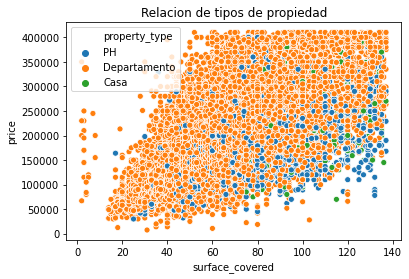

In [212]:
sns.scatterplot(data=data_ml, x='surface_covered', y='price', hue='property_type')
plt.title('Relacion de tipos de propiedad')

Como se muestra en el grafico existen relacion entre el precio de Casa y PH, por lo que esto esta afectando a los datos, ya que no existen una clara separacion de las propiedades para que el modelo realice una prediccion correcta.
Mi propuesta es un estudio mas profundo del DataSet en donde se realicen filtros para obtener una Data en donde los tipos de propiedades se encuentren claramente separadas.Asi como en este caso unicamente se emplearon los datos de Capital Federal, se puede ir probando con diferentes barrios o regiones.Una vez se cuente con una data adecuada y con separaciones clara entre los tipos de propiedad en relacion a su precio. De esta manera el modelo se vera afectado positivamente, ya que ahora cuenta con una buena base de entrenamiento y se pueden  ir agregando a esta base nuevos barrios o regiones, hasta llegar a completar la base de Properaty.

#### Conclusion

Al realizar modificaciones a la Data, como lo son PolynomialFeatures, el modelo de Regresion Lineal se vio afectado positivamente, ya que su R2 mejoro considerablemente, Al emplear una regularizacion con Ridge, su rendimiento se vio muy poco mejorado, y al encontrar el mejor Hiperparametro de igual manera , el resulto no obtuvo una mejora considerable, esto por los pocos parametros establecidos en la grilla de GridSearchCV, de nuevo por la limitacion de computo de mi equipo.

Emplear modelos avanzados tiene una gran ventaja, ya que se pueden ensamblar modelos con bajo rendimento y lograr y modelo mucho mejor. Dos grandes factores a tomar en cuenta:
- Procesamiento de la data, es importante que los modelos cuenten con una Data completa y bien adecuada para el tipo de modelo que vamos a emplear. Si el procesamiento es el adecuado los modelos tendran una buena base de entrenamiento , con la cual realizar precisiones puntuales al introducirle nuevos datos para su prediccion.
- Hardware del equipo, Una parte fundamental, ya que si desea emplear modelos complejos empleando gran numero de modelos estimadores, esta informacion se almacena en la memoria RAM, del equipo, por lo que poca memoria limitara las posibilidades.

Se requiere de un estidio mas profundo de la Data con las adecuaciones necesarias. De esta manera nos aseguramos de un completo proceso y optimizacion del modelo de Machine Learning.

# Clustering

Para esta parde de Clustering, empleo mi DataSet donde aplico todos los filtros de Proyecto 1

In [213]:
data_ml.head(2)

,l3,property_type,rooms,bathrooms,surface_total,surface_covered,price
1,Boedo,PH,2.0,2.0,70.0,58.0,159000.0
2,Palermo,PH,2.0,1.0,45.0,45.0,125000.0


In [214]:
'''Veo las dimenciones del DataSet'''
data_ml.shape

(38133, 7)

In [215]:
'''Corrobor que no tenga datos nulos'''
data_ml.isnull().sum()

l3                 0
property_type      0
rooms              0
bathrooms          0
surface_total      0
surface_covered    0
price              0
dtype: int64

Dedico aplicar cluster para realizar la clasificación de la data en función del tipo de propiedad, por lo que realizo un pairplot para visualizar en que variables se logran separaran mas las tipos de variables y agilizar la clusterización

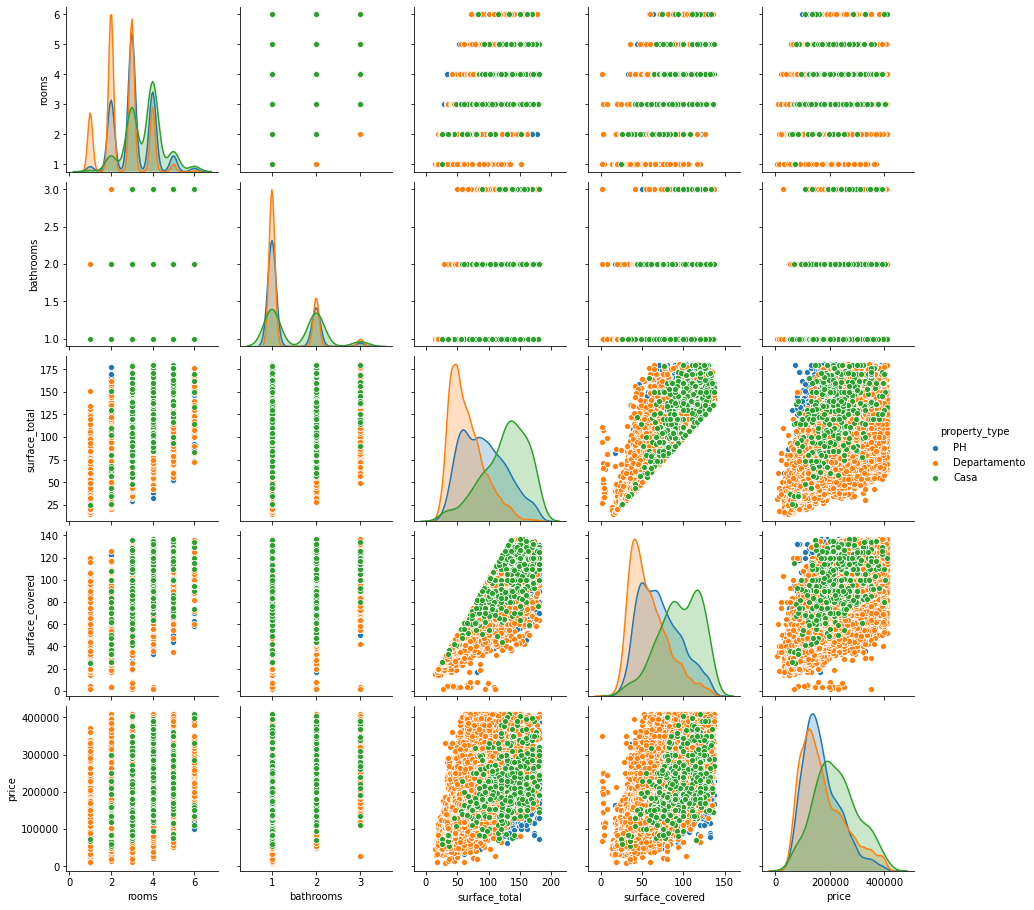

In [216]:
sns.pairplot(data_ml, hue='property_type')

Con base en el grafico decido emplear Suface_total y surface_covered como mis variables, ya que con estas las propiedades se visualiza una mejor separacion en funcion del tipo de propiedad

Surface_total y price, son variables en donde se logra una buena separación entre los tipos de graficos

In [217]:
x = data_ml[['surface_total', 'surface_covered']]

In [218]:
x.head(2)

,surface_total,surface_covered
1,70.0,58.0
2,45.0,45.0


# KMeans

In [219]:
'''Importar librerias'''
from sklearn.cluster import KMeans

In [220]:
'''Definir modelo'''
kmeans_1 = KMeans(n_clusters=3, random_state=1)

Empleo n_clusters=3, ya que se que cuento con 3 diferentes tipos de propiedad

In [221]:
'''Entreno modelo'''
kmeans_1.fit(x)

KMeans(n_clusters=3, random_state=1)

In [222]:
'''Convertir  x a un array, para mayor facilidad al graficar'''
x = x.to_numpy()

In [223]:
etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[ 76.75060926  67.40189055]
 [121.43676041 100.14676502]
 [ 44.83113077  40.86917335]]


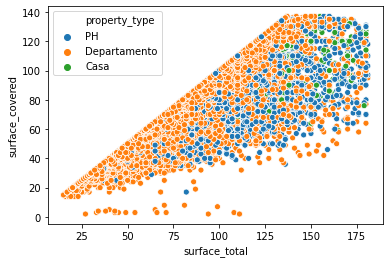

In [224]:
'''Grafico de la Clasificacion Real de mis datos'''
sns.scatterplot(x='surface_total', y='surface_covered', data=data_ml, hue='property_type')

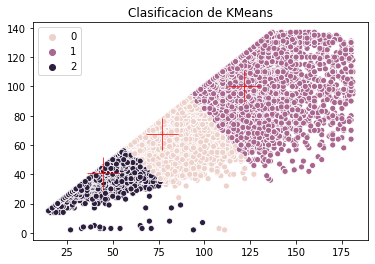

In [225]:
'''Clasificacion de KMeans'''
sns.scatterplot(x[:, 0], x[:, -1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='red', marker="+", s=1000)
plt.title('Clasificacion de KMeans')
plt.show()

Al realizar clusterización con Kmean, este no logra realizar una correcta separación de los datos en funcion del tipo de propiedad

# PCA + KMeans

Ahora realizo un PCA empleando ahora el total del dataset proveniente del proyecto 1. Al cual lo adecuo para realizar reduccion de dimensionalidad

Convertir las variables categoricas

In [226]:
l3_cluster = pd.get_dummies(data_ml['l3'])

In [227]:
pt = pd.get_dummies(data_ml['property_type'])

In [228]:
data_cluster = pd.concat([l3_cluster,pt,data_ml], axis=1, join='inner')

In [229]:
data_cluster.head(2)

,Abasto,Agronomía,Almagro,Balvanera,Barracas,Barrio Norte,Belgrano,Boca,Boedo,Caballito,...,Casa,Departamento,PH,l3,property_type,rooms,bathrooms,surface_total,surface_covered,price
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,Boedo,PH,2.0,2.0,70.0,58.0,159000.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,Palermo,PH,2.0,1.0,45.0,45.0,125000.0


In [230]:
x = data_cluster.drop(['price','l3','property_type'], axis=1)

# PCA

In [231]:
from sklearn.decomposition import PCA

for i in range(1,10,1):
    pca = PCA(n_components=i)
    x_cluster = pca.fit_transform(x)
    
    print('valor de n_components:',i, pca.explained_variance_ratio_.sum())

valor de n_components: 1 0.9498835745363378
valor de n_components: 2 0.998900366396154
valor de n_components: 3 0.9991264106526251
valor de n_components: 4 0.9992647309700307
valor de n_components: 5 0.9993683205476338
valor de n_components: 6 0.9994370431538279
valor de n_components: 7 0.9994896663153784
valor de n_components: 8 0.9995362938694327
valor de n_components: 9 0.9995737748346158


Reduzco la dimencionalidad a 2 

In [232]:
pca = PCA(n_components=2)
x_cluster = pca.fit_transform(x)

In [233]:
x_cluster.shape

(38133, 2)

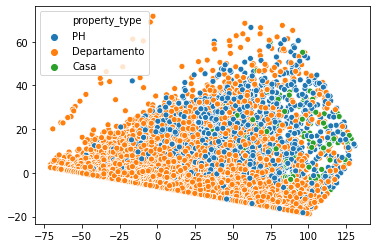

In [234]:
sns.scatterplot(x=x_cluster[:,0], y=x_cluster[:,1], hue=data_cluster['property_type'])

Al emplear PCA para realizar la reduccion de dimesionalidad, se logra obtener el tipo de propiedad. Sin embargo exite una gran relacion entre el tipo Casa y PH por lo que esto puede ser un problema al momento de emplear PCA o DBSCAN.
Este grafico se toma como comparativa para el resultado final de la clusterizacion, en donde se espera que el grafico final de la clusterizacion sea similar o igual a este grafico.

# KMeans

In [235]:
'''Entreno modelo'''
kmeans_1.fit(x_cluster)

KMeans(n_clusters=3, random_state=1)

In [236]:
etiquetas_1 = kmeans_1.labels_
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[ 10.43879366  -0.88856346]
 [-31.16232183   0.41040071]
 [ 65.74281711   0.69700407]]


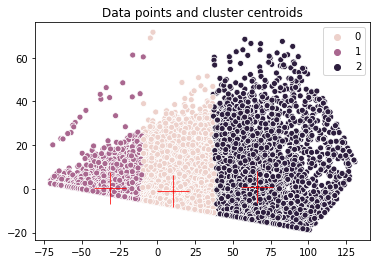

In [237]:
sns.scatterplot(x_cluster[:, 0], x_cluster[:, -1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='red', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

De igual manera que en el caso anterior, KMeans no realiza una correcta clasificación de mi data.
KMeans no logra una correcta clasificación de los datos